In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

## Load IHSG

In [2]:
# load IHSG dataset
stock_ihsg = pd.read_csv('../dataset/^JKSE.csv')
stock_ihsg = stock_ihsg[['Date', 'Close']]
stock_ihsg = stock_ihsg.sort_values(by = ['Date'])
stock_ihsg

Date        Close
0     2015-10-09  4589.344238
1     2015-10-12  4630.707031
2     2015-10-13  4483.076172
3     2015-10-15  4507.194824
4     2015-10-16  4521.881836
...          ...          ...
1259  2020-10-02  4926.733887
1260  2020-10-05  4958.769043
1261  2020-10-06  4999.221191
1262  2020-10-07  5004.327148
1263  2020-10-08  5039.142090

[1264 rows x 2 columns]

In [3]:
# check missing values
stock_ihsg.isnull().sum()

Date      0
Close    50
dtype: int64

In [4]:
def interactive_plot(df, title):
  fig = px.line(title=title)
  for i in df.columns[1:]:
    fig.add_scatter(x=df['Date'], y=df[i], name=i)
  fig.show()

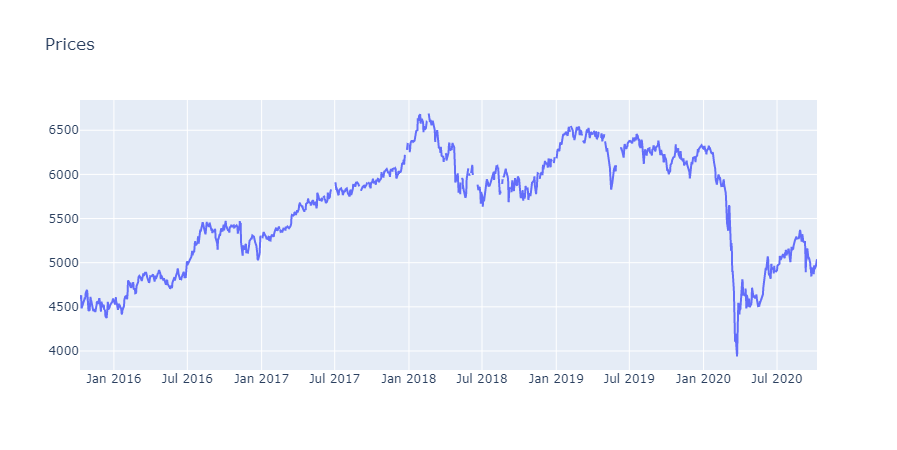

In [5]:
# plot IHSG (missing value)
interactive_plot(stock_ihsg, 'Prices')

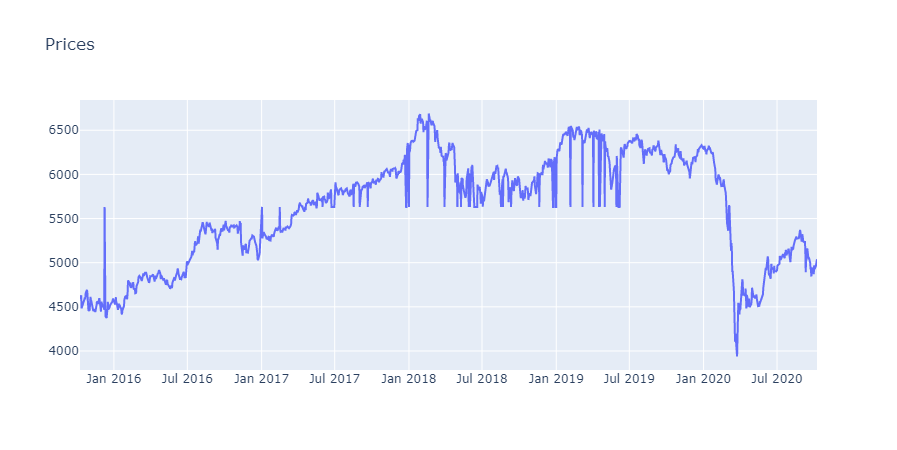

In [6]:
# fill missing value with mean
stock_ihsg_fillna_mean = stock_ihsg.copy()
stock_ihsg_fillna_mean['Close'] = stock_ihsg_fillna_mean['Close'].fillna(stock_ihsg_fillna_mean['Close'].mean())
interactive_plot(stock_ihsg_fillna_mean, 'Prices')

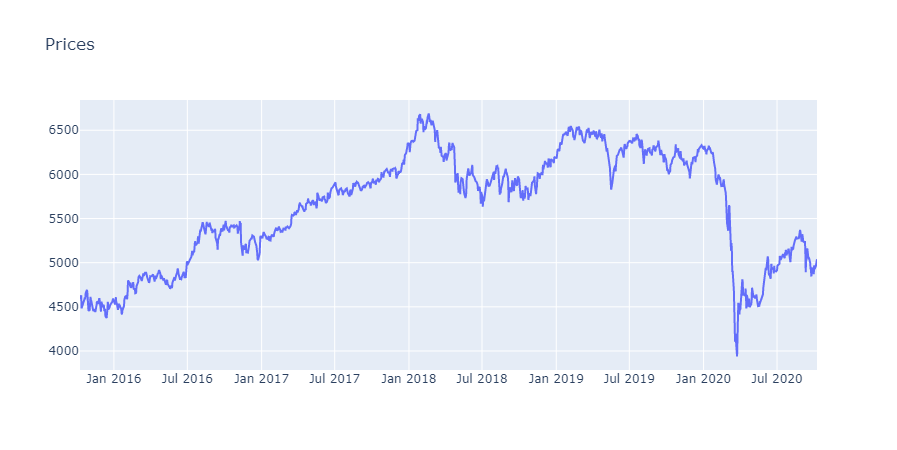

In [7]:
# fill missing value with interpolation
stock_ihsg_fillna_interp = stock_ihsg.copy()
stock_ihsg_fillna_interp['Close'] = stock_ihsg_fillna_interp['Close'].interpolate(method='linear')
interactive_plot(stock_ihsg_fillna_interp, 'Prices')

## Load other stocks

In [8]:
stock_bbca = pd.read_csv('../dataset/BBCA.JK.csv')
stock_bbca = stock_bbca[['Date', 'Close']]
stock_bbca = stock_bbca.sort_values(by = ['Date'])
stock_bbca.isnull().sum()

Date     0
Close    0
dtype: int64

In [9]:
stock_bbni = pd.read_csv('../dataset/BBNI.JK.csv')
stock_bbni = stock_bbni[['Date', 'Close']]
stock_bbni = stock_bbni.sort_values(by = ['Date'])
stock_bbni.isnull().sum()

Date     0
Close    0
dtype: int64

In [10]:
stock_pwon = pd.read_csv('../dataset/PWON.JK.csv')
stock_pwon = stock_pwon[['Date', 'Close']]
stock_pwon = stock_pwon.sort_values(by = ['Date'])
stock_pwon.isnull().sum()

Date     0
Close    0
dtype: int64

In [11]:
stock_ptro = pd.read_csv('../dataset/PTRO.JK.csv')
stock_ptro = stock_ptro[['Date', 'Close']]
stock_ptro = stock_ptro.sort_values(by = ['Date'])
stock_ptro.isnull().sum()

Date     0
Close    0
dtype: int64

In [12]:
stock_icbp = pd.read_csv('../dataset/ICBP.JK.csv')
stock_icbp = stock_icbp[['Date', 'Close']]
stock_icbp = stock_icbp.sort_values(by = ['Date'])
stock_icbp.isnull().sum()

Date     0
Close    0
dtype: int64

In [13]:
stock_inkp = pd.read_csv('../dataset/INKP.JK.csv')
stock_inkp = stock_inkp[['Date', 'Close']]
stock_inkp = stock_inkp.sort_values(by = ['Date'])
stock_inkp.isnull().sum()

Date     0
Close    0
dtype: int64

In [14]:
stock_kaef = pd.read_csv('../dataset/KAEF.JK.csv')
stock_kaef = stock_kaef[['Date', 'Close']]
stock_kaef = stock_kaef.sort_values(by = ['Date'])
stock_kaef.isnull().sum()

Date     0
Close    0
dtype: int64

## Combine all columns

In [15]:
stock_all = pd.DataFrame()
stock_all['Date'] = stock_ihsg['Date'].copy()
stock_all['IHSG'] = stock_ihsg_fillna_interp['Close'].copy()
stock_all['BBCA'] = stock_bbca['Close'].copy()
stock_all['BBNI'] = stock_bbni['Close'].copy()
stock_all['PWON'] = stock_pwon['Close'].copy()
stock_all['PTRO'] = stock_ptro['Close'].copy()
stock_all['ICBP'] = stock_icbp['Close'].copy()
stock_all['INKP'] = stock_inkp['Close'].copy()
stock_all['KAEF'] = stock_kaef['Close'].copy()
stock_all

Date         IHSG     BBCA    BBNI   PWON    PTRO     ICBP  \
0     2015-10-09  4589.344238  13200.0  5025.0  416.0   328.0   6537.5   
1     2015-10-12  4630.707031  13375.0  5025.0  413.0   342.0   6562.5   
2     2015-10-13  4483.076172  12950.0  4835.0  385.0   332.0   6375.0   
3     2015-10-15  4507.194824  12975.0  5025.0  394.0   321.0   6600.0   
4     2015-10-16  4521.881836  12800.0  5100.0  383.0   322.0   6600.0   
...          ...          ...      ...     ...    ...     ...      ...   
1259  2020-10-02  4926.733887  27525.0  4510.0  346.0  1590.0  10075.0   
1260  2020-10-05  4958.769043  27600.0  4620.0  344.0  1610.0  10100.0   
1261  2020-10-06  4999.221191  28500.0  4670.0  352.0  1635.0  10100.0   
1262  2020-10-07  5004.327148  28775.0  4670.0  354.0  1640.0  10000.0   
1263  2020-10-08  5039.142090  28900.0  4670.0  370.0  1675.0  10075.0   

        INKP    KAEF  
0      830.0   775.0  
1      835.0   815.0  
2      815.0   825.0  
3      815.0   820.0  
4      820.0   855.0  
...      ...     ...  
1259  8875.0  3040.0  
1260  8875.0  3090.0  
1261  8825.0  3090.0  
1262  8800.0  3090.0  
1263  8900.0  3080.0  

[1264 rows x 9 columns]

In [16]:
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

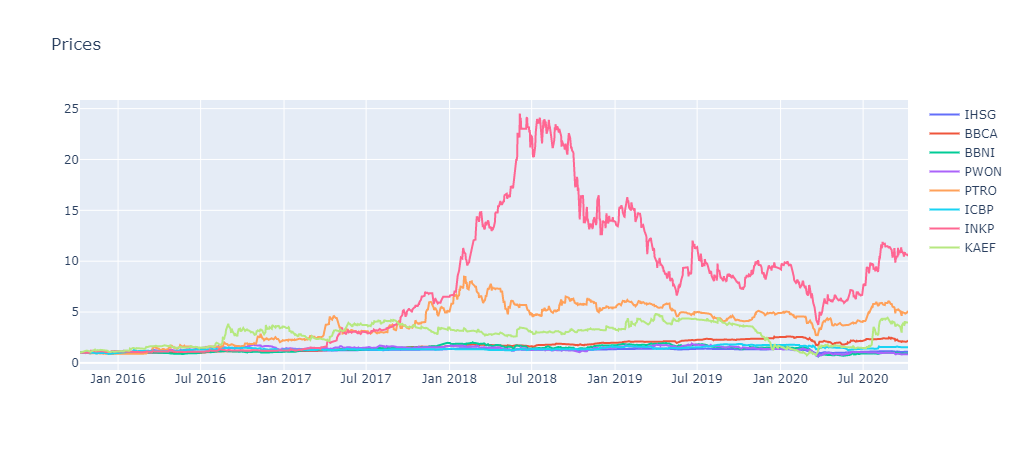

In [17]:
interactive_plot(normalize(stock_all), 'Prices')

## Overall return

In [66]:
def overall_return(df):
  df_overall_return = df.copy()
  for i in df.columns[1:]:
    df_overall_return[i][0] = ((df[i][len(stock_all)-1] - df[i][0]) / df[i][0]) * 100
  df_overall_return = df_overall_return.drop(columns=['Date'])
  df_overall_return = df_overall_return.iloc[0,:]
  return df_overall_return

In [67]:
print(overall_return(stock_all))

IHSG      9.800918
BBCA    118.939394
BBNI     -7.064677
PWON    -11.057692
PTRO    410.670732
ICBP     54.110899
INKP    972.289157
KAEF    297.419355
Name: 0, dtype: float64


## Daily return

In [37]:
def daily_return(df):
  df_daily_return = df.copy()
  for i in df.columns[1:]:
    for j in range(1, len(df)):
      df_daily_return[i][j] = ((df[i][j] - df[i][j-1]) / df[i][j-1]) * 100
    df_daily_return[i][0] = 0
  return df_daily_return

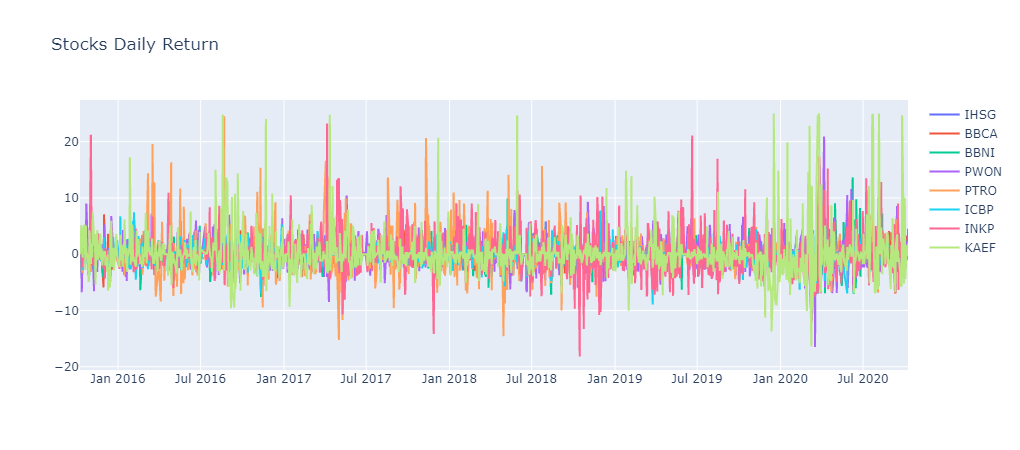

In [38]:
stocks_daily_return = daily_return(stock_all)
interactive_plot(stocks_daily_return, 'Stocks Daily Return')

<AxesSubplot:>

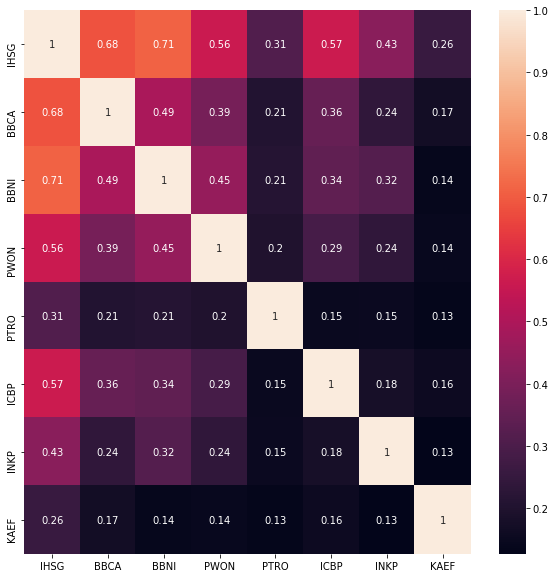

In [68]:
cm = stocks_daily_return.drop(columns=['Date']).corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

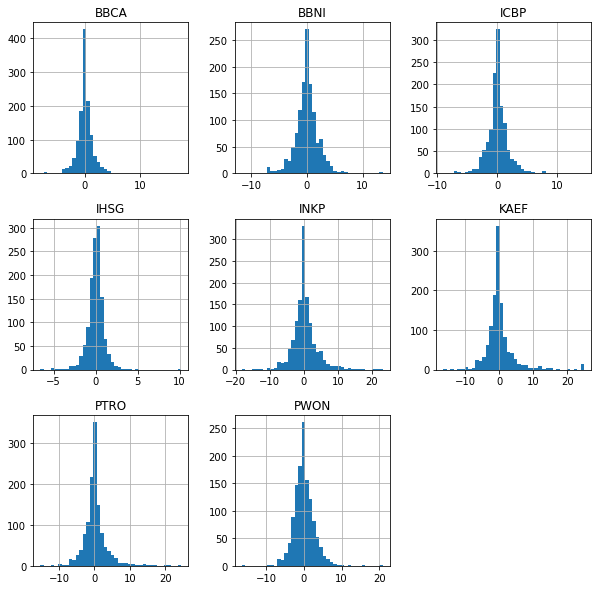

In [69]:
stocks_daily_return.hist(figsize=(10,10), bins=40);

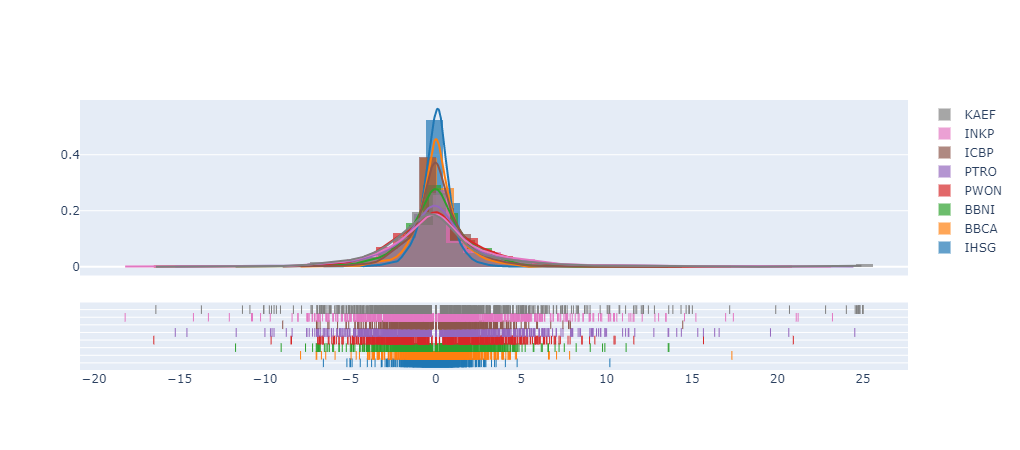

In [70]:
df_hist = stocks_daily_return.copy()
df_hist = df_hist.drop(columns=['Date'])
data = []
for i in df_hist.columns:
  data.append(stocks_daily_return[i].values)
fig = ff.create_distplot(data, df_hist.columns)
fig.show()